<a href="https://colab.research.google.com/github/Sohith-Pothula/My-Data-Science-Journey/blob/main/Titanic_Survival_Rate_(Random_Forest_for_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

titanic_data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

titanic_data = titanic_data.dropna(subset=['Survived'])

X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']

X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
X['Age'] = X['Age'].fillna(X['Age'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

sample = X_test.iloc[10:11]
prediction = rf_classifier.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Sample Passenger: {'Pclass': 1.0, 'Sex': 1.0, 'Age': 37.0, 'SibSp': 1.0, 'Parch': 0.0, 'Fare': 53.1}
Predicted Survival: Did Not Survive


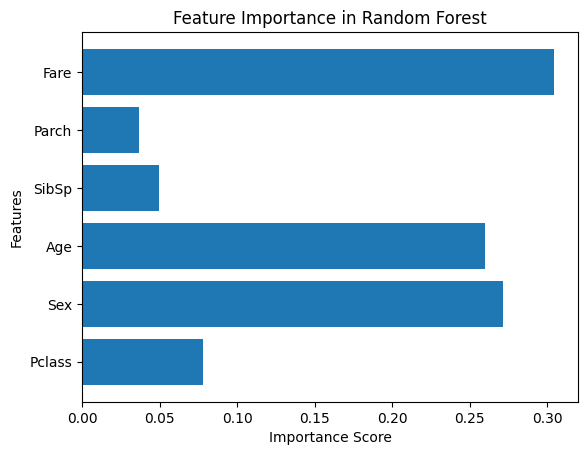

In [11]:
import matplotlib.pyplot as plt

importances = rf_classifier.feature_importances_
features = X.columns

plt.figure()
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


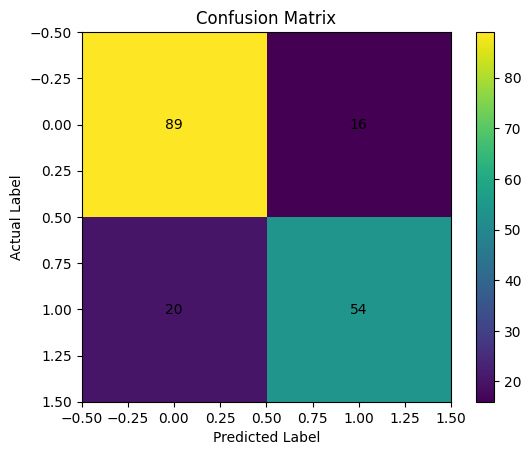

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


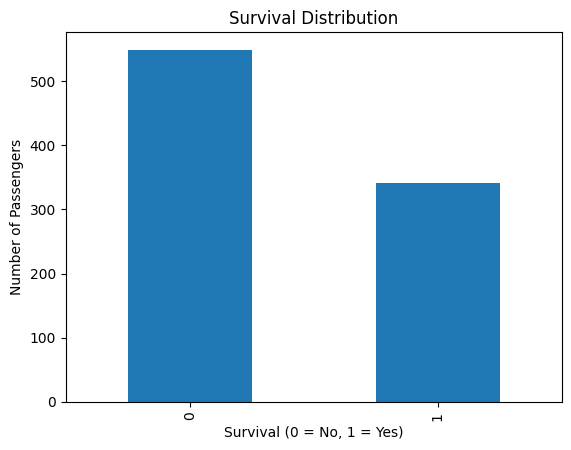

In [13]:
plt.figure()
titanic_data['Survived'].value_counts().plot(kind='bar')
plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.title("Survival Distribution")
plt.show()


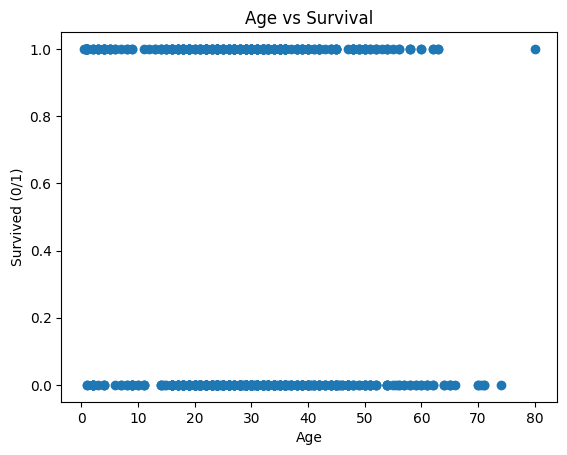

In [14]:
plt.figure()
plt.scatter(titanic_data['Age'], titanic_data['Survived'])
plt.xlabel("Age")
plt.ylabel("Survived (0/1)")
plt.title("Age vs Survival")
plt.show()


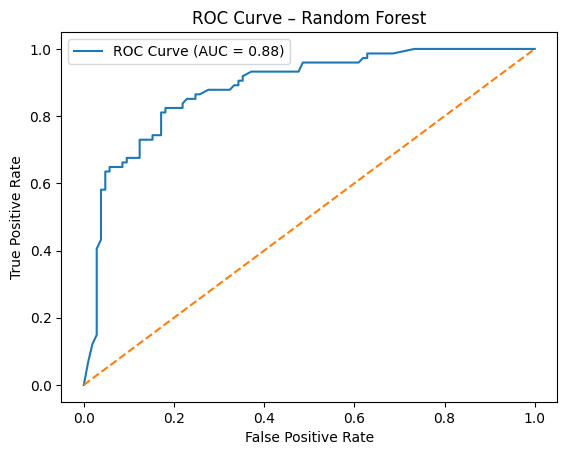

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability scores for positive class (Survived = 1)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')  # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()


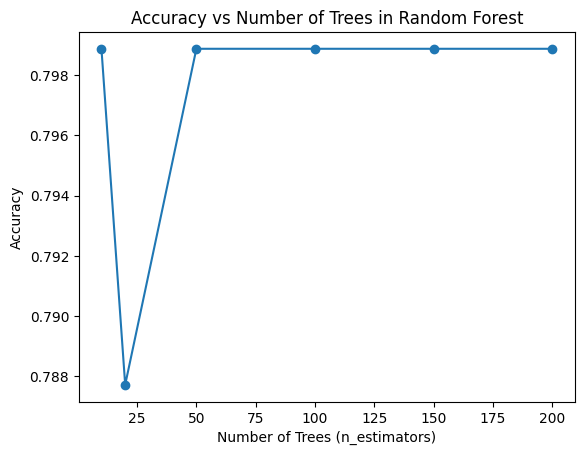

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

tree_counts = [10, 20, 50, 100, 150, 200]
accuracies = []

for n in tree_counts:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_temp = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_temp)
    accuracies.append(acc)

# Plot Accuracy vs Trees
plt.figure()
plt.plot(tree_counts, accuracies, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Trees in Random Forest")
plt.show()
